# SMV


# Non lienar SVM

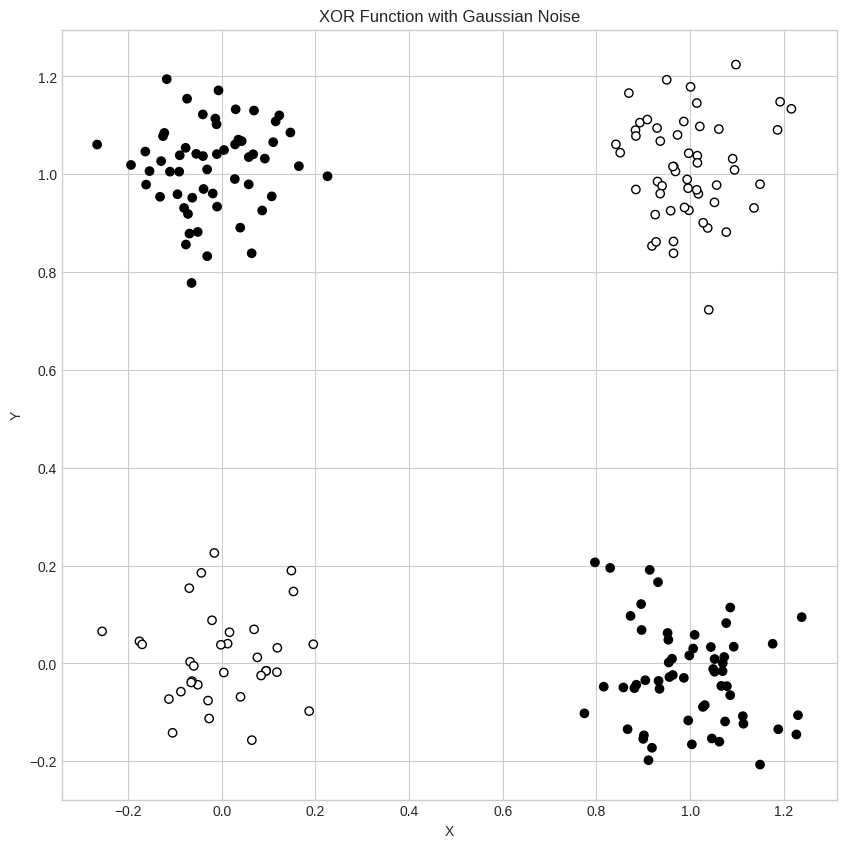

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def xor_sample_with_noise(num_samples, noise_mean, noise_std):
    samples = []
    for _ in range(num_samples):
        x = random.randint(0, 1)
        y = random.randint(0, 1)
        z = int(bool(x) ^ bool(y))
        x_noise = x + np.random.normal(noise_mean, noise_std)
        y_noise = y + np.random.normal(noise_mean, noise_std)
        samples.append((x_noise, y_noise, z))
    return samples

# Generate samples with noise
num_samples = 200
noise_mean = 0
noise_std = 0.1
samples = xor_sample_with_noise(num_samples, noise_mean, noise_std)

# Split the samples into inputs (x, y) and output (z)
inputs = np.array([(x, y) for x, y, _ in samples])
outputs = np.array([z for _, _, z in samples])

# Plot the data
fig = plt.figure(figsize=(10,10))
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('XOR Function with Gaussian Noise')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


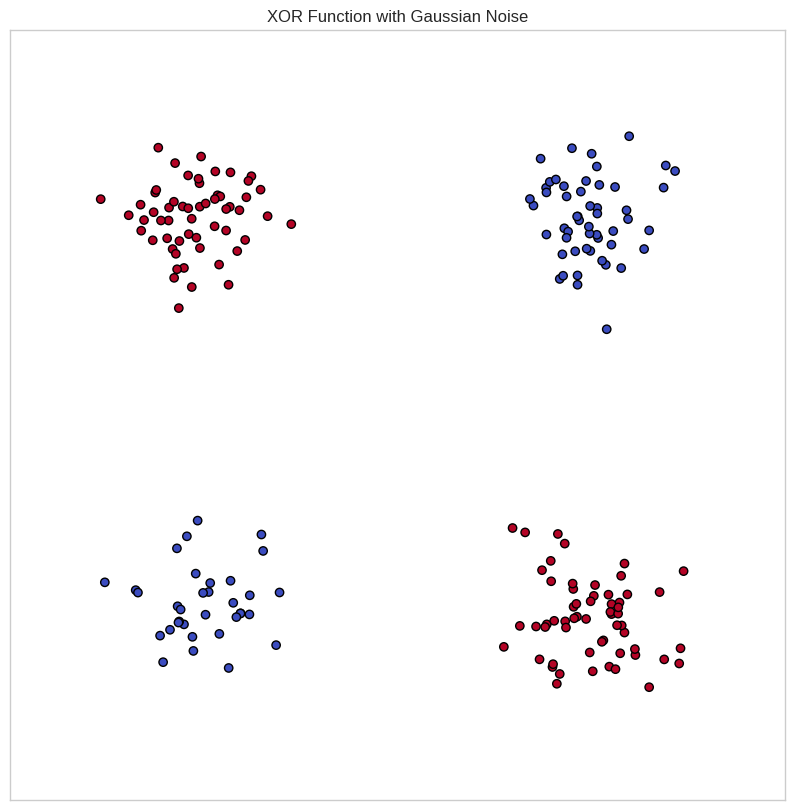

In [ ]:
# Plot the data
fig ,ax= plt.subplots(figsize=(10,10))
ax.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('XOR Function with Gaussian Noise')
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)

plt.show()


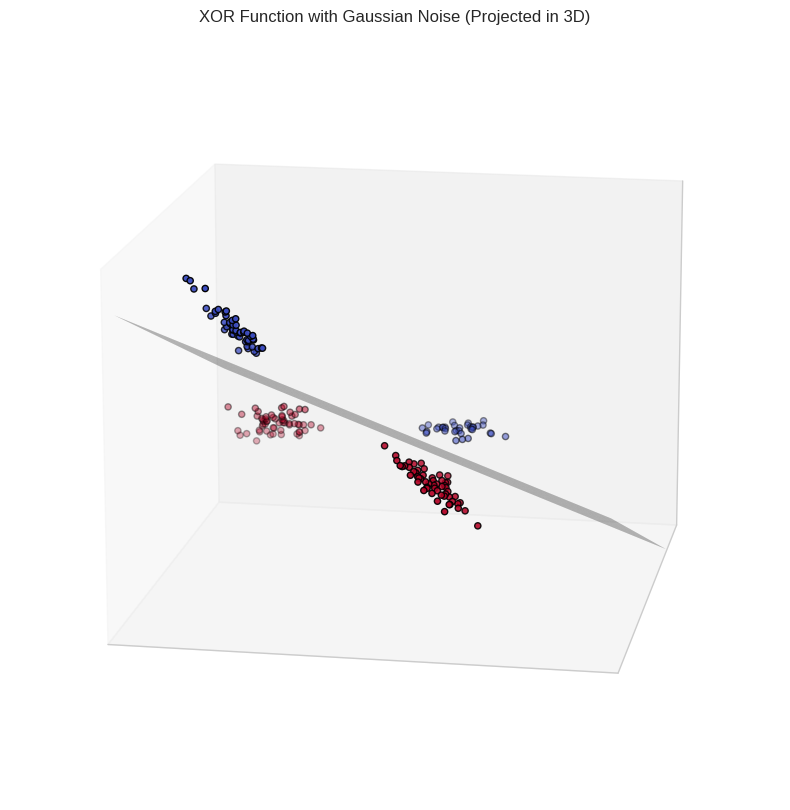

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# Apply projection function f(x, y) = (x, y, xy)
projected_inputs = np.array([(x, y, x * y) for x, y in inputs])

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(projected_inputs, outputs)

# Define hyperplane parameters
z = lambda x,y: (-svm.intercept_[0]-svm.coef_[0][0]*x -svm.coef_[0][1]*y) / svm.coef_[0][2]

tmp = np.linspace(-1,1.5,30)
x,y = np.meshgrid(tmp,tmp)


# Create 3D scatter plot with hyperplane
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_inputs[:, 0], projected_inputs[:, 1], projected_inputs[:, 2], c=outputs, cmap=plt.cm.coolwarm, edgecolors='k')


ax.set_title('XOR Function with Gaussian Noise (Projected in 3D)')

# Plot hyperplane
ax.plot_surface(x,y, z(x,y), color='black', alpha = 0.3)
ax.view_init(15, 100)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.set_xlim(-1,1.5)
ax.set_ylim(-1,1.5)
ax.set_zlim(-1,1.5)

plt.show()




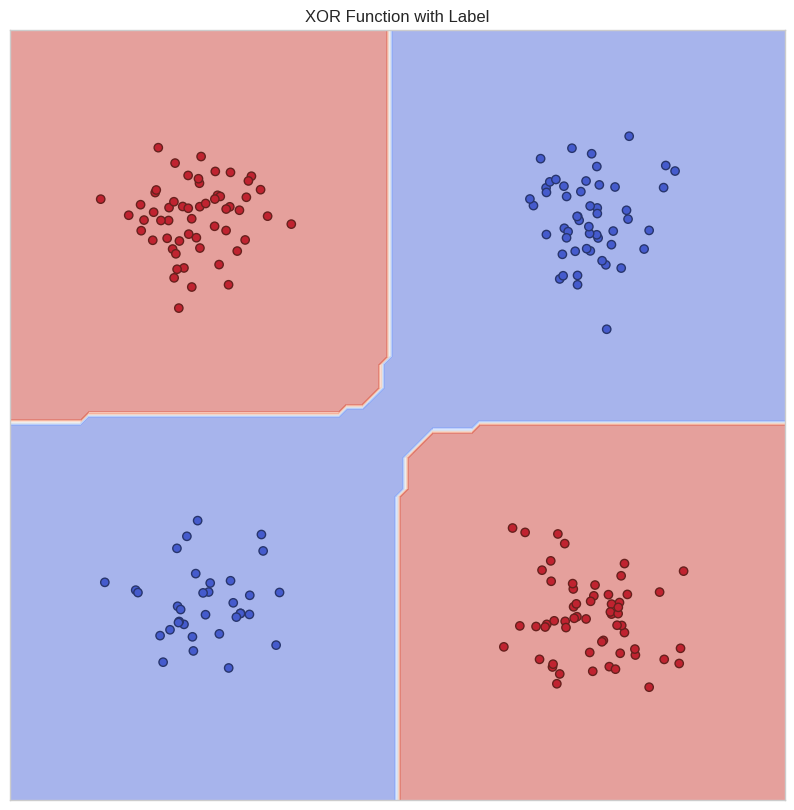

In [ ]:
def check_point_position(x, y, z, svm):
    # Calculate the value of the hyperplane at the given (x, y, z) point
    hyperplane_value = svm.predict([[x, y,z]])[0]

    # Check the position of the point relative to the hyperplane
    if hyperplane_value > 0:
        return 1
    elif hyperplane_value < 0:
        return -1
    else:
        return 0


# Generate 2D grid coordinates
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)


Z = np.zeros((100,100))
for i in range(len(x)):
  for j in range(len(y)):
    Z[i,j] = check_point_position(x[i],y[j],x[i]*y[j], svm)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot the data
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(inputs[:, 0], inputs[:, 1], c=outputs, edgecolors='k', cmap=plt.cm.coolwarm)
#ax.xlabel('X')
#ax.ylabel('Y')
ax.set_title('XOR Function with Label')
ax.contourf(X,Y,Z, alpha = 0.5, cmap=plt.cm.coolwarm)
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
plt.show()


#Regression.


<ipython-input-3-7a46086c6fd1>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_3d[:, 0] ,X_3d[:, 1], X_3d[:,2], c='r', marker='o', edgecolors='k', cmap=plt.cm.coolwarm)


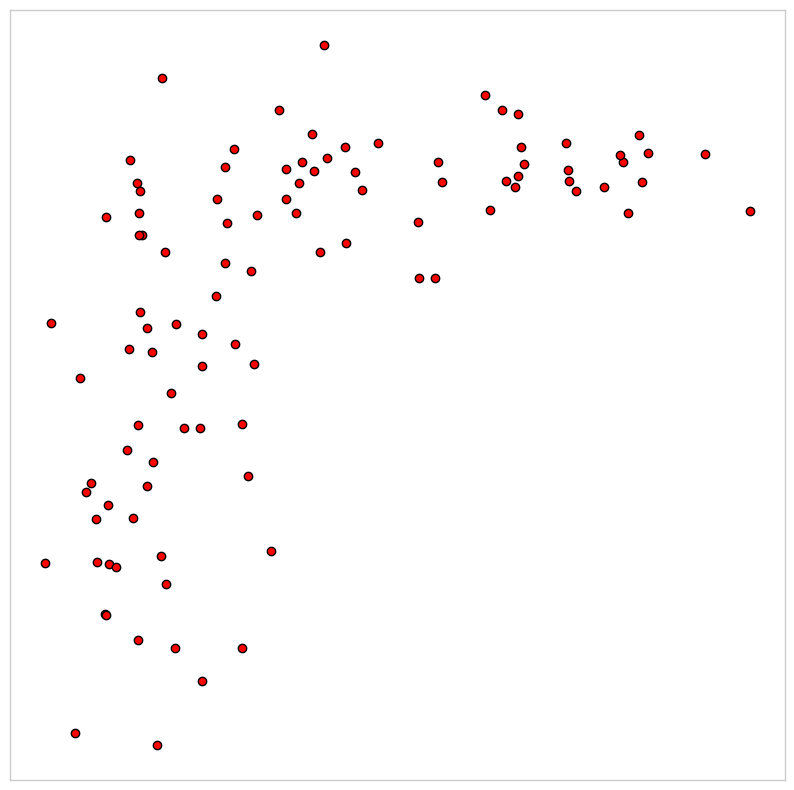

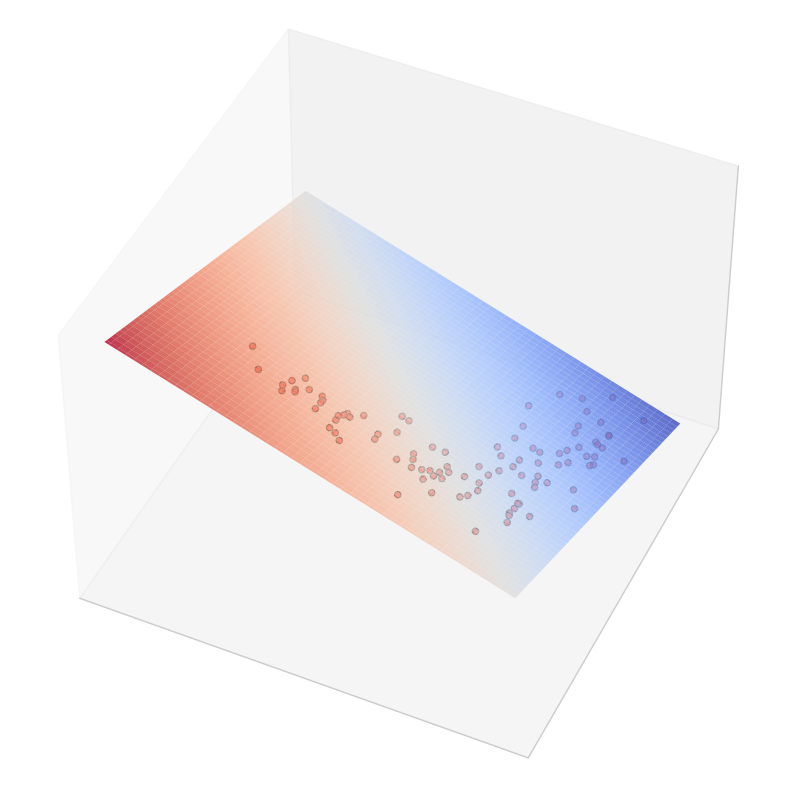

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate nonlinear regression problem in 2D
np.random.seed(43)
X = np.concatenate(np.array([np.linspace(0,0.1,50) , np.linspace(0.1,1,50)])) + np.random.normal(0, 0.1, size=100)
y =  np.concatenate(np.array([np.linspace(0.1,1,50), np.linspace(0,0.1,50)])) + np.random.normal(0, 0.1, size=100)
y[50:] = X[-1] + np.random.normal(0, 0.1, size=50)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X,y, c='r', marker='o', edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())

# Project data into 3D space
X_3d = np.column_stack((X,y, X + y))

# Solve the linear regression problem in 3D
co, residuals, _, _ = np.linalg.lstsq(X_3d, y, rcond=None)

# Create grid for plotting the regression surface in 3D
x = np.linspace(-0.2, 1.5, 100)
y = np.linspace(-0.2, 1.5, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z_grid =   (-1*X_grid -1*Y_grid ) *(-1)

# Plot the regression surface in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap= plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_3d[:, 0] ,X_3d[:, 1], X_3d[:,2], c='r', marker='o', edgecolors='k', cmap=plt.cm.coolwarm)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.view_init(45, 115)

plt.show()



In [ ]:
# Plot the data in 2D
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data in 2D')
plt.colorbar(label='Y')
plt.show()


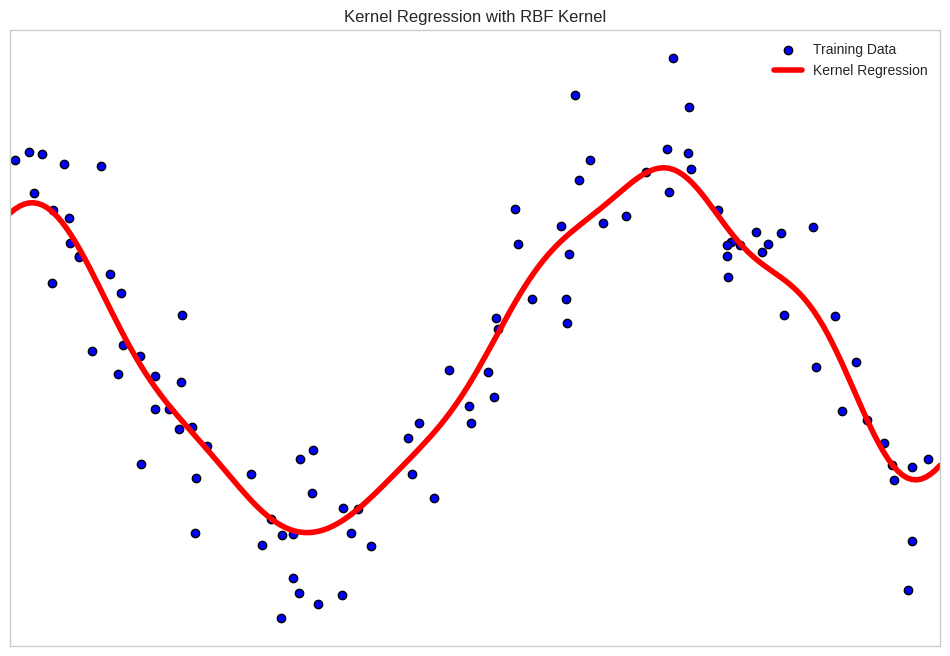

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge


# Generate random data
np.random.seed(42)
X = np.random.uniform(-4.2, 4.2, size=(100, 1))
y = np.sin(X) + np.random.normal(0, 0.3, size=(100, 1))

# Test data
X_test = np.linspace(-4.2, 4.2, num=200).reshape(-1, 1)

# Perform kernel regression
sigma = 1.0
clf = KernelRidge(alpha = 1, kernel = "rbf", gamma =2)
clf.fit(X,y)
y_pred = clf.predict(X_test)

# Plot the results
fig = plt.figure(figsize=(12,8))
plt.scatter(X, y, c='blue', label='Training Data',  marker='o', edgecolors='k')
plt.plot(X_test, y_pred, c='red', linewidth = 4,  label='Kernel Regression')

plt.title('Kernel Regression with RBF Kernel')
plt.legend()
plt.xlim(-4.2,4.2)
plt.xticks(())
plt.yticks(())
plt.show()



In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.kernel_approximation import RBFSampler

class RFF_regression:


  def __init__(self, num_features):
      self.num_features= num_features
      self.model = ridge = KernelRidge(alpha=1.0, kernel = "linear")
      self.rff_feature = RBFSampler(n_components=self.num_features, gamma = 2)



  def fit(self, X,y):

    # Transform the input features using the RFF
    transformed_X = self.rff_feature.fit_transform(X)

    # Fit a ridge regression model on the transformed features
    self.model.fit(transformed_X, y)


  def predict(self, X):
    transformed_X = self.rff_feature.fit_transform(X)
    return self.model.predict(transformed_X)


<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


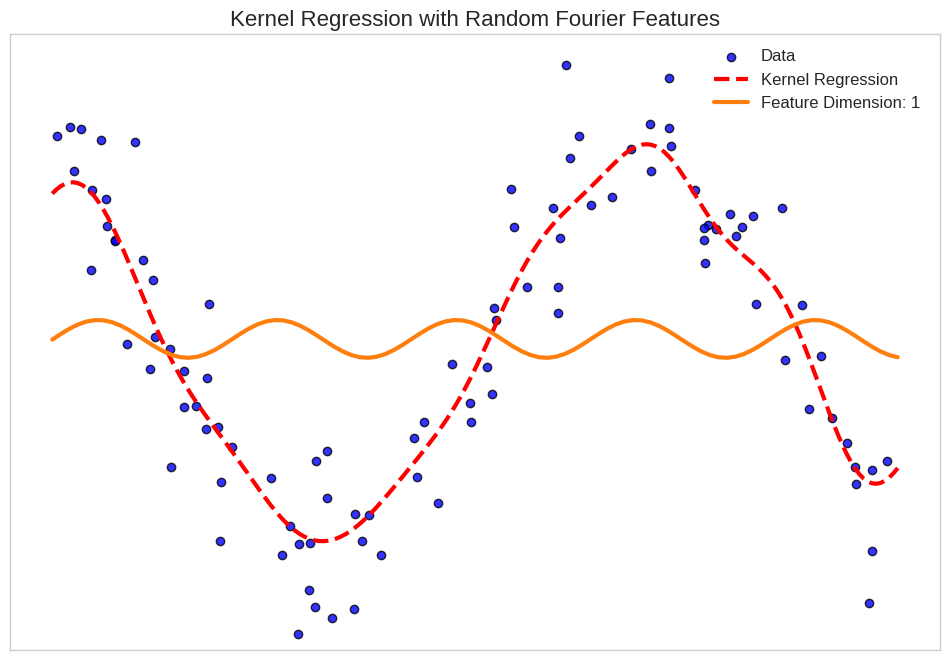

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


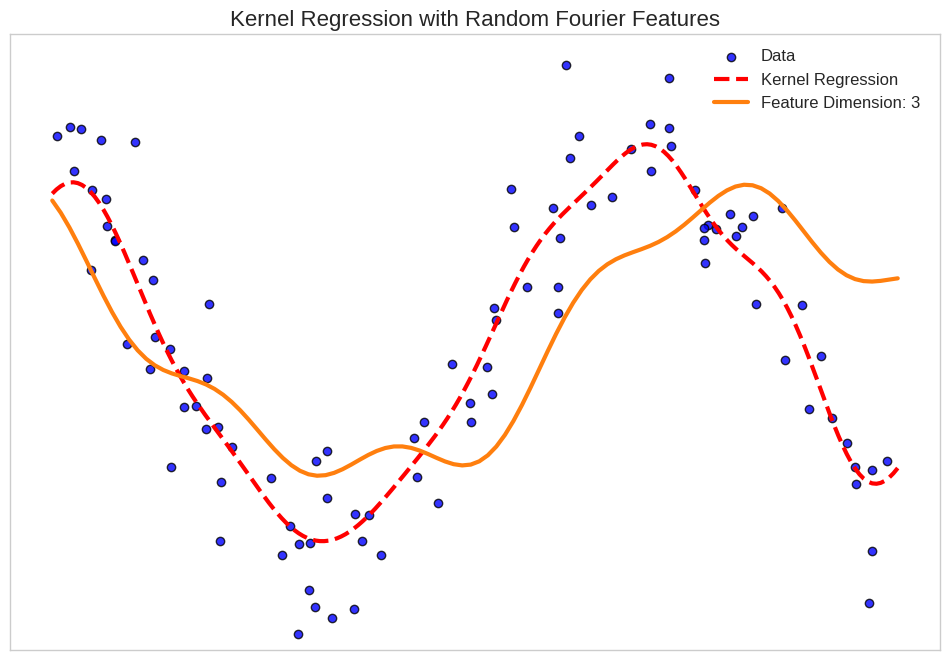

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


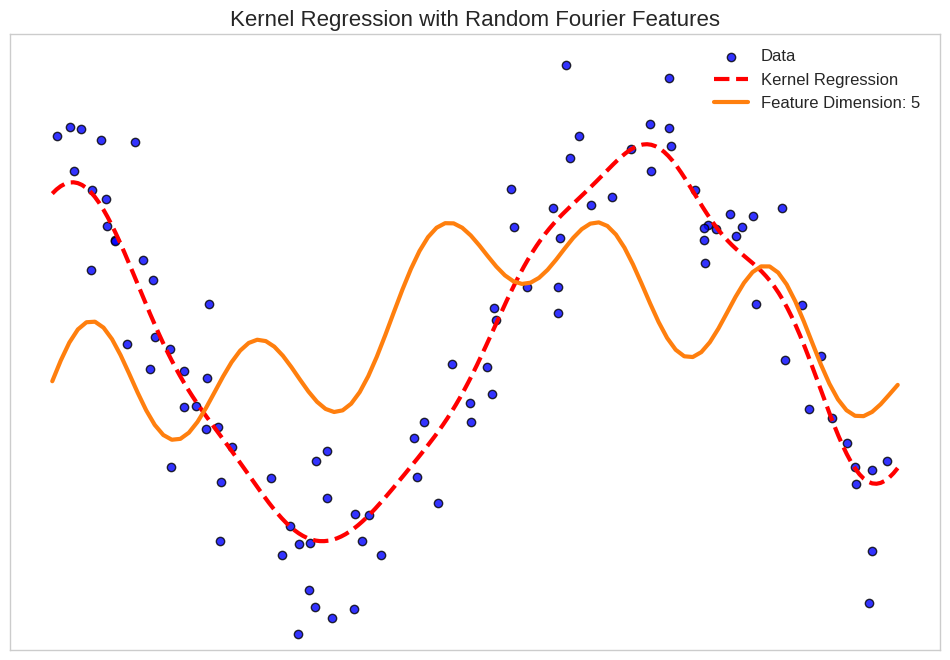

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


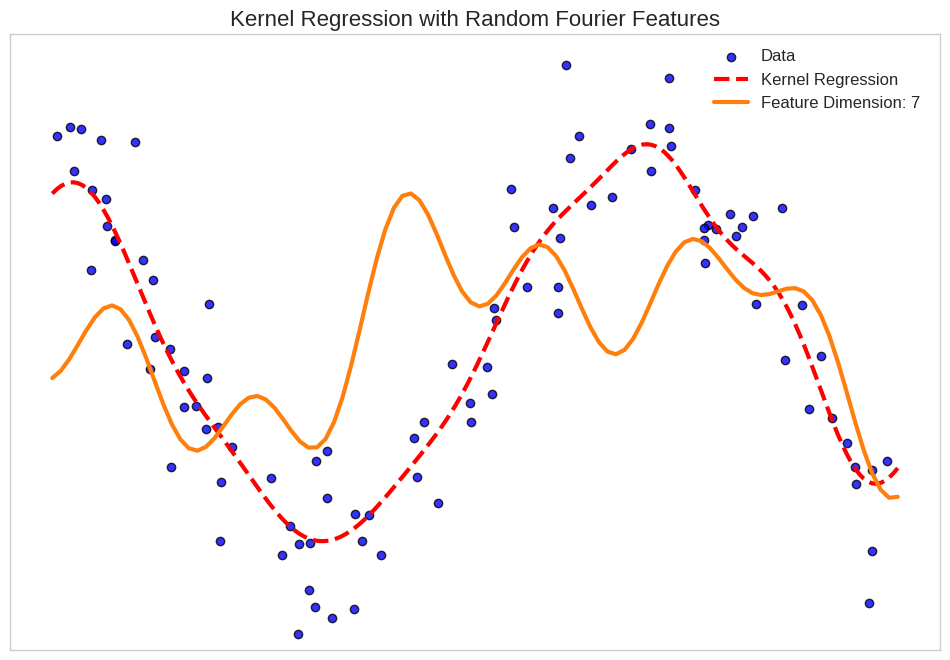

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


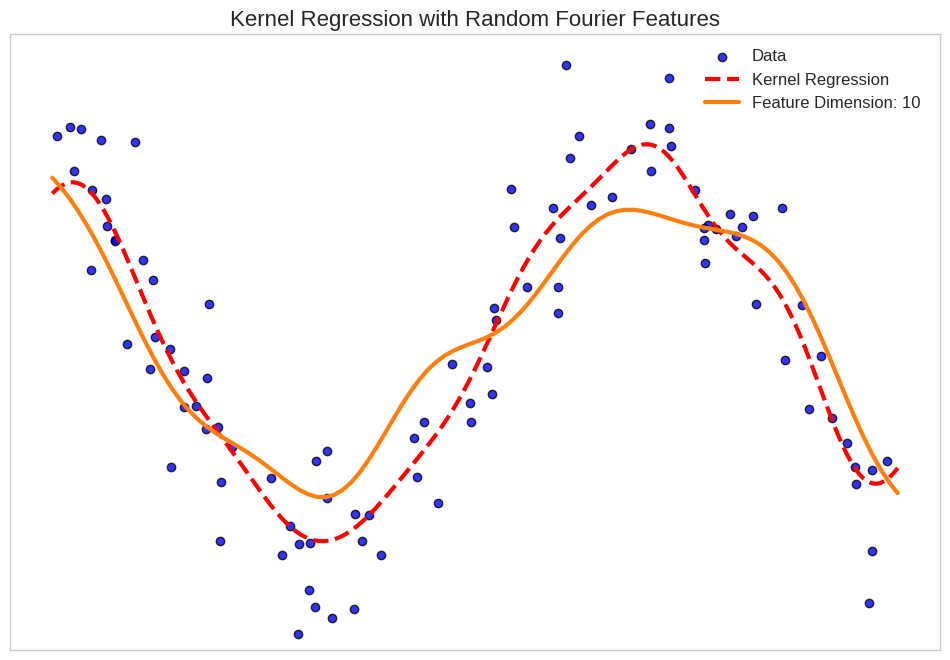

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


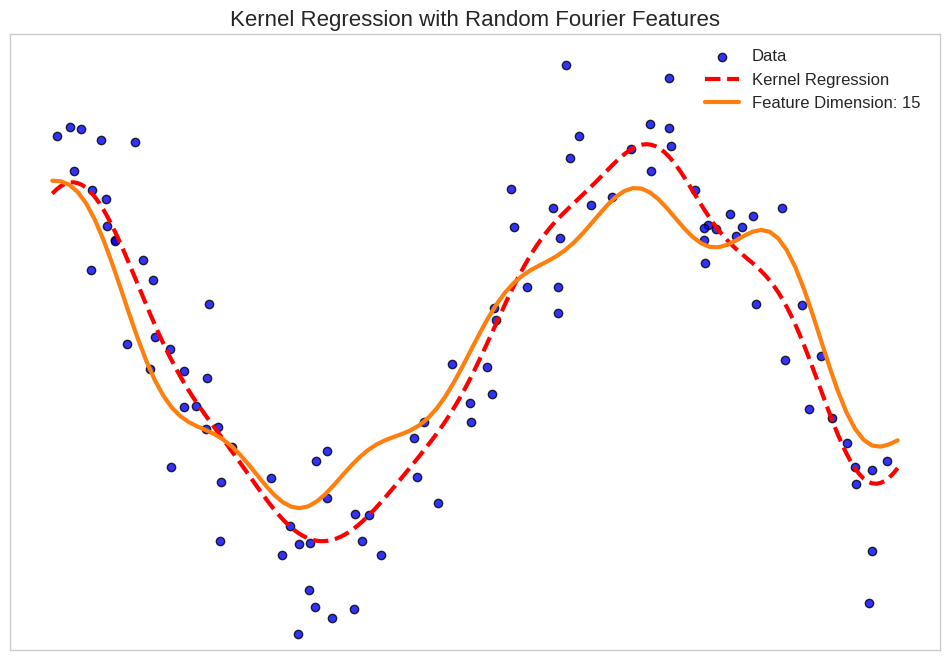

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


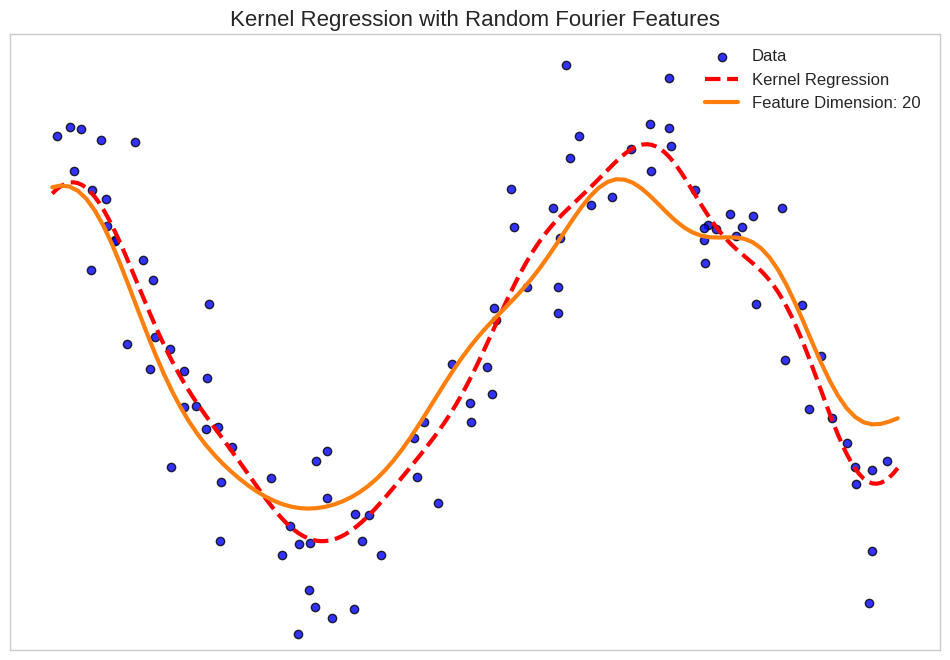

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


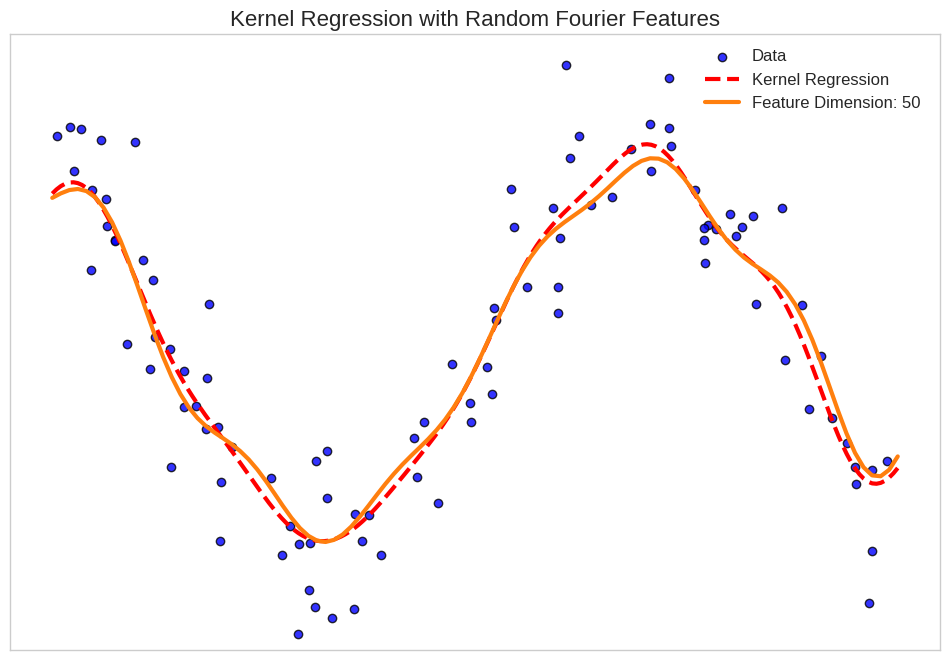

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


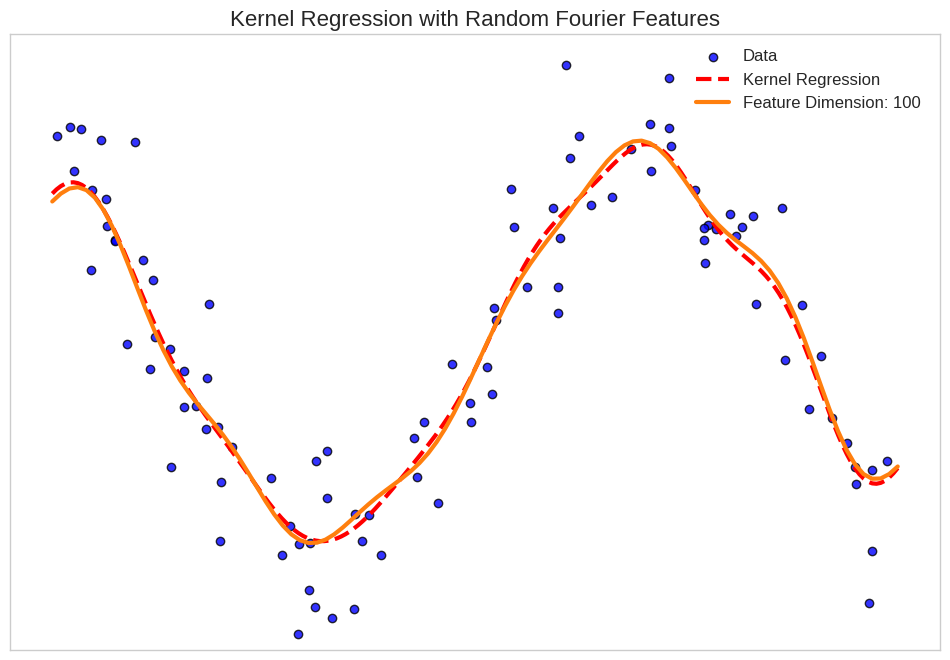

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


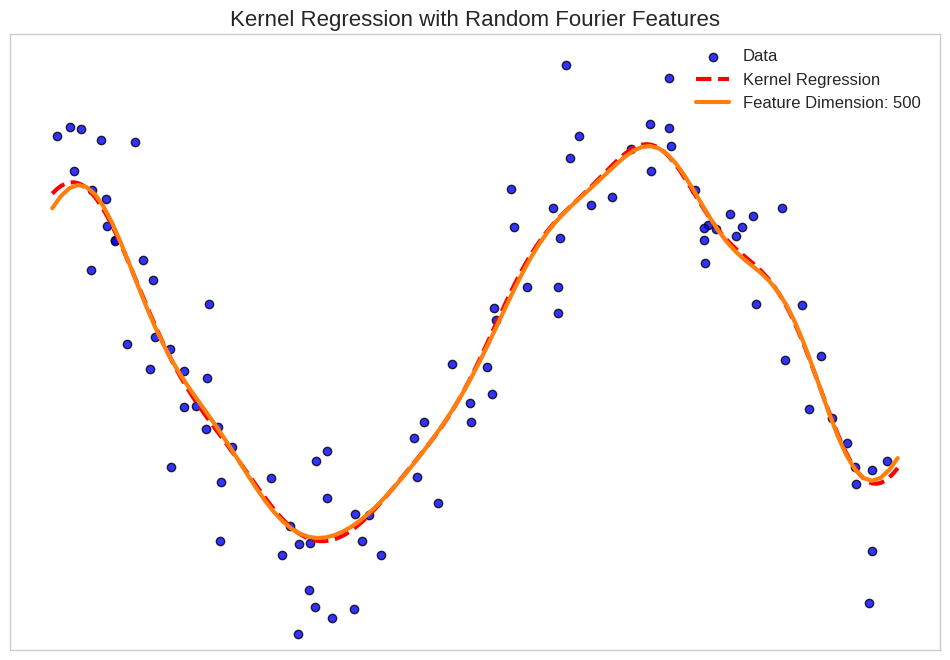

<ipython-input-16-d3694e2bed08>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


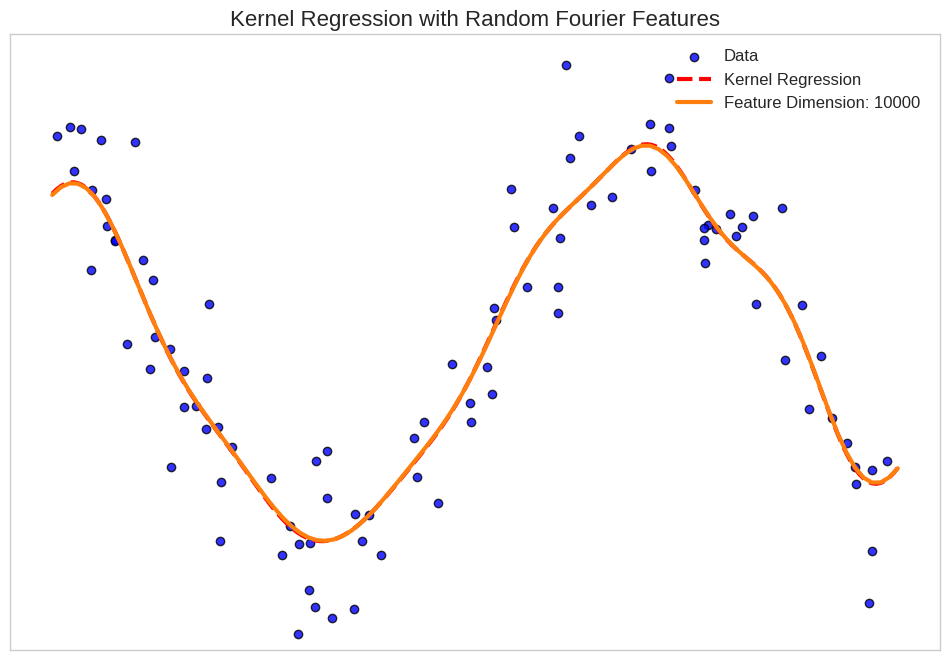

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

# Generate some random data points with noise
np.random.seed(0)


# Number of random features to use
num_features = [1,3,5,7,10,15,20,50,100,500,10000]

# Create a larger and more visually appealing plot


# Generate points for plotting the regression functions
X_plot = np.linspace(-4.2, 4.2, 100)[:, None]

# Perform regression with different numbers of random features
for i, num in enumerate(num_features):
    # Random Fourier features
    rbf_feature = RBFSampler(gamma=2, n_components=num, random_state=0)
    X_features = rbf_feature.fit_transform(X)
    X_plot_features = rbf_feature.transform(X_plot)

    # Ridge regression
    ridge = Ridge(alpha=1)
    ridge.fit(X_features, y)

    # Predict using the fitted model
    y_plot = ridge.predict(X_plot_features)

    # Plot the regression function
    plt.figure(figsize=(12, 8))
    plt.style.use('seaborn-whitegrid')

    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Data', alpha=0.8, marker='o', edgecolors='k')
    plt.plot(X_test, y_pred, c='red', linewidth = 3,  label='Kernel Regression', linestyle = '--')
    plt.plot(X_plot, y_plot, label=f'Feature Dimension: {num} ', linewidth=3, color = "tab:orange")

    # Set plot title and axis labels
    plt.title('Kernel Regression with Random Fourier Features', fontsize=16)
    plt.xticks(())
    plt.yticks(())


    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.ylim(-1.5,1.5)

    # Add legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()


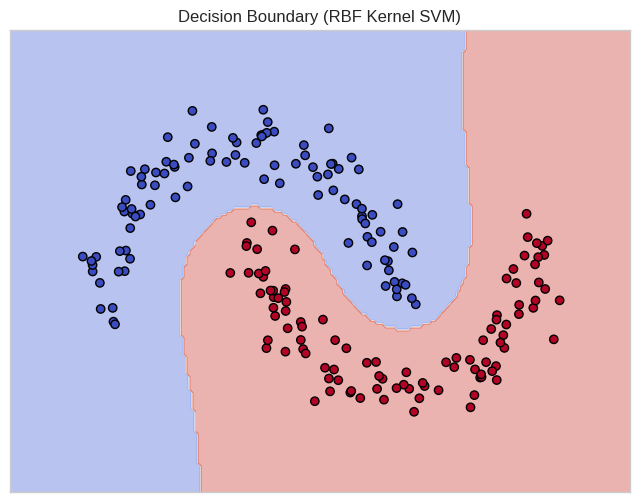

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate the Halfmoon dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=43)

# Fit SVM with RBF kernel
svm = SVC(gamma = 2, kernel='rbf')
svm.fit(X, y)

# Create a meshgrid to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.title('Decision Boundary (RBF Kernel SVM)')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import accuracy_score
from threading import active_count
import time
from sklearn.linear_model import SGDClassifier
from sklearn import  svm, pipeline, datasets
from sklearn.kernel_approximation import RBFSampler, Nystroem
import matplotlib.pyplot as plt

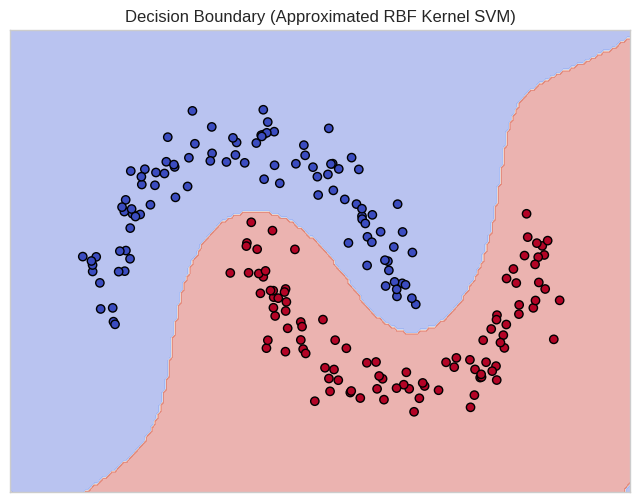

In [ ]:


# create random features
feature_map_fourier = RBFSampler()

# transform data
rff_svm = pipeline.Pipeline(
[("feature_map", feature_map_fourier), ("svm", svm.LinearSVC())]
)
rff_svm.set_params(feature_map__n_components= 100)

# fitting SMV
rff_svm.fit(X ,y)

#Create a meshgrid to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rff_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.title('Decision Boundary (Approximated RBF Kernel SVM)')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()




